<a href="https://colab.research.google.com/github/pruthviraj2453/house_price_prediction/blob/main/House_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We are  buliding a model for an real estate firm to predict the house prices based on features givven - (supervised learning) we will be using root mean square error as loss function for our model

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split , StratifiedShuffleSplit



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe571ac0ee0>,
      dtype=object)

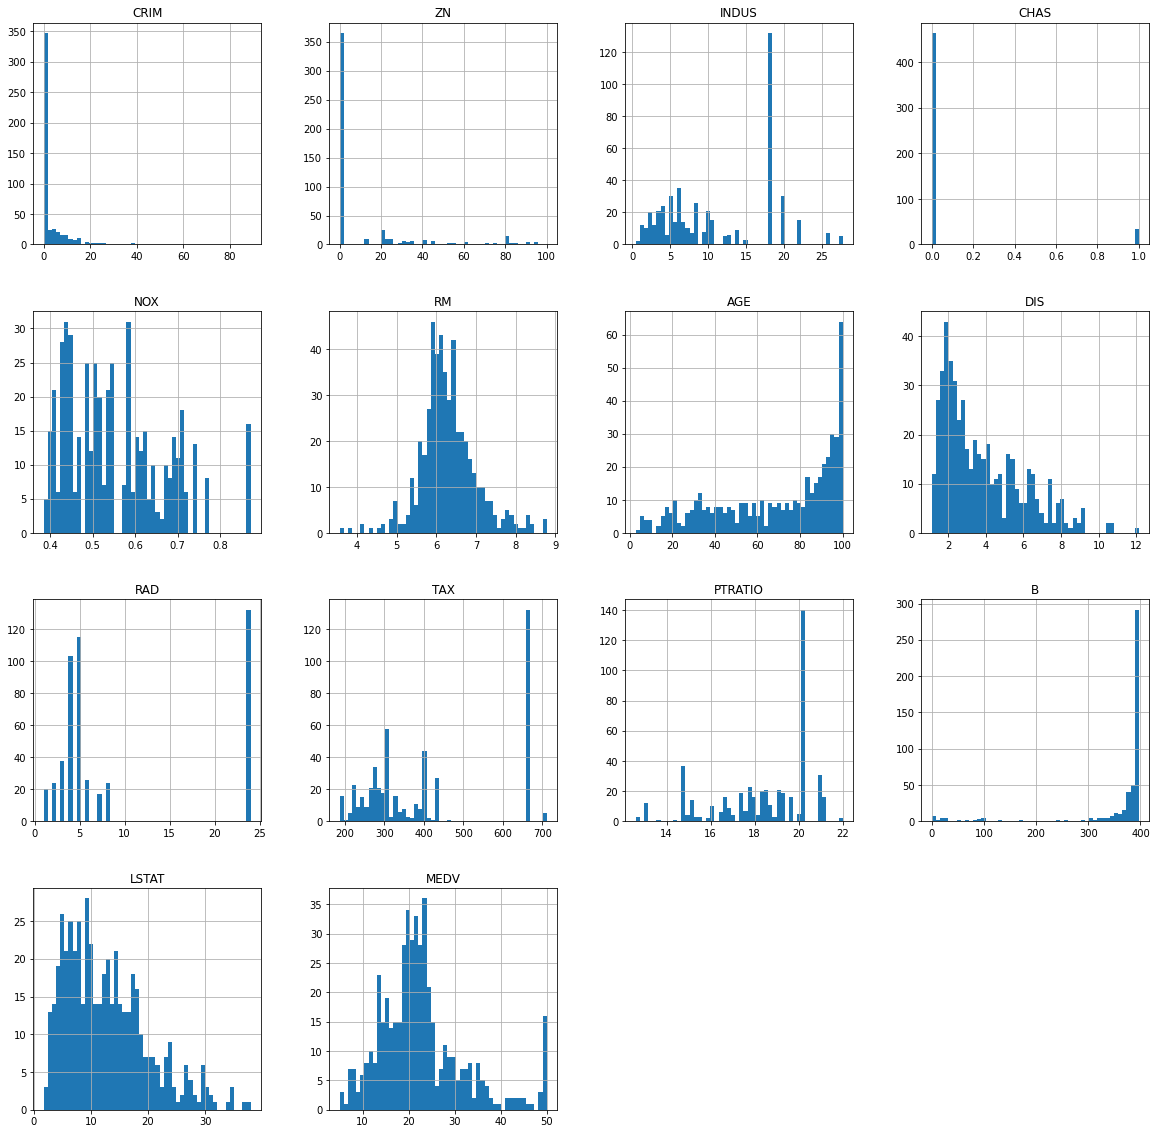

In [ ]:
housing =  pd.read_csv("/content/Housing_data.csv")

#checking the data
#housing.info()
housing.isna
housing['CHAS'].value_counts()

#plotting histogram to get general overview
housing.hist(bins=50,figsize=(20,20))


In [ ]:
#making split train test function to split the test data
def split_train_test(data,test_ratio):
  np.random.seed(1) # to make stop generating random numbers to hide test dataset from it
  shuffled = np.random.permutation(len(data))
  print(shuffled)
  test_size = int(len(data)*test_ratio)
  test_indices = shuffled[:test_size]
  train_indices =shuffled[test_size:]
  return data.iloc[train_indices],data.iloc[test_indices]

In [ ]:
#To test directly using function fro sklearn

test_set,train_set= train_test_split(housing,train_size=0.2,random_state=1)
print(len(train_set))
print(len(test_set))

400
99


In [ ]:
#Now to do sampling (because we need to test our model on variety of data ex Aliens observe earth only from one country then false)
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=1)
for train_indices,test_indices in split.split(housing,housing['CHAS']):
  split_train_set = housing.loc[train_indices]
  split_test_set = housing.loc[test_indices]

#so by doing this you will get the 0 and 1 valuue of CHAS almost equal in both train and test sets
print(split_train_set['CHAS'].value_counts())
split_test_set['CHAS'].value_counts()

0    371
1     28
Name: CHAS, dtype: int64


0    93
1     7
Name: CHAS, dtype: int64

In [ ]:
housing = split_train_set
housing.shape # make sure to do this , all below operations should be carried out on trainig sets only

(399, 14)

In [ ]:
#Finding correlation matrix for all the columns
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.685095
ZN         0.369527
B          0.313105
DIS        0.225639
CHAS       0.185237
AGE       -0.366244
RAD       -0.374742
CRIM      -0.376470
NOX       -0.421101
TAX       -0.448260
INDUS     -0.462451
PTRATIO   -0.514104
LSTAT     -0.743717
Name: MEDV, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe57244c700>,
      dtype=object)

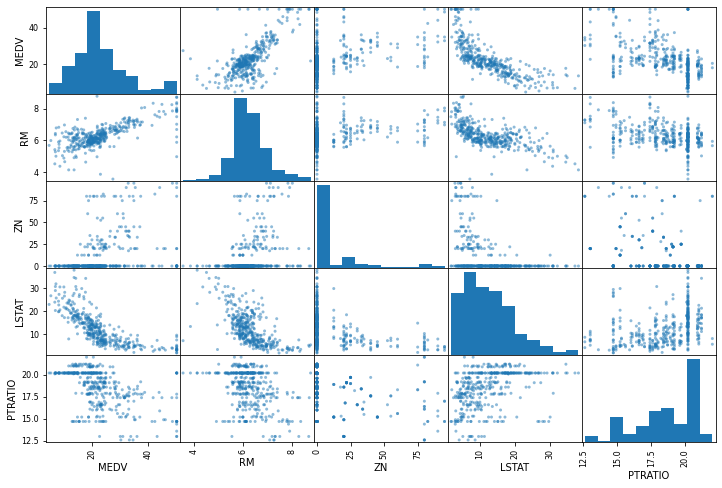

In [ ]:
from pandas.plotting import scatter_matrix
features=['MEDV','RM','ZN','LSTAT','PTRATIO']
scatter_matrix(housing[features],figsize=(12,8))
#So doing this we can check the graphs for correlation, for self correlation it will give histogram
#for other variables check small graphs according to labels individually and then see correlation

Text(0, 0.5, 'MEDV')

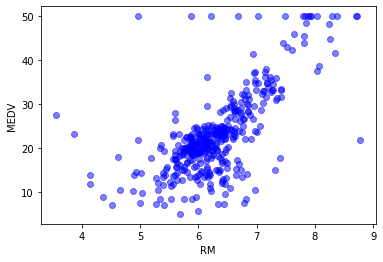

In [ ]:
x = housing['RM']
y = housing['MEDV']
a=plt.scatter(x,y,alpha = 0.5,color='b')
plt.xlabel('RM')
plt.ylabel('MEDV')


In [ ]:
#Now we will try to add new attribute(column) in our data according to our benefit
#housing['TPR'] = housing['TAX']/housing['RM']

corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False) #we can check that for tpr we will have high correlation which shows success of new attribute
#housing.plot(kind='scatter',x='TPR',y='MEDV',alpha =0.9) #you can also check by plotting scatter plot

MEDV       1.000000
RM         0.685095
ZN         0.369527
B          0.313105
DIS        0.225639
CHAS       0.185237
AGE       -0.366244
RAD       -0.374742
CRIM      -0.376470
NOX       -0.421101
TAX       -0.448260
INDUS     -0.462451
PTRATIO   -0.514104
LSTAT     -0.743717
Name: MEDV, dtype: float64

In [ ]:
print(housing)
housing_label = housing['MEDV']
housing_features = housing.drop('MEDV',axis=1)
print(housing_label)
print(housing_features)

         CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD  TAX  \
111   0.13058   0.0  10.01     0  0.547  5.872   73.1  2.4775    6  432   
410  25.94060   0.0  18.10     0  0.679  5.304   89.1  1.6475   24  666   
93    0.14866   0.0   8.56     0  0.520  6.727   79.9  2.7778    5  384   
108   0.17134   0.0  10.01     0  0.547  5.928   88.2  2.4631    6  432   
101   0.12802   0.0   8.56     0  0.520  6.474   97.1  2.4329    5  384   
..        ...   ...    ...   ...    ...    ...    ...     ...  ...  ...   
188   0.01381  80.0   0.46     0  0.422  7.875   32.0  5.6484    4  255   
113   0.06899   0.0  25.65     0  0.581  5.870   69.7  2.2577    2  188   
411  73.53410   0.0  18.10     0  0.679  5.957  100.0  1.8026   24  666   
403  51.13580   0.0  18.10     0  0.597  5.757  100.0  1.4130   24  666   
277   0.00906  90.0   2.97     0  0.400  7.088   20.8  7.3073    1  285   

     PTRATIO       B  LSTAT  MEDV  
111     17.8  338.63  15.37  20.4  
410     20.2  127.36  26.64

In [ ]:
 #take care of missing attributes
#1) remove the rows havingg data points 2) remove the whole column having null data 3)fill null values
housing['RM'].dropna() #1

housing.drop(['RM'],axis=1)  #2

housing['RM'].fillna(housing['RM'].mean())#3


111    5.872
410    5.304
93     6.727
108    5.928
101    6.474
       ...  
188    7.875
113    5.870
411    5.957
403    5.757
277    7.088
Name: RM, Length: 399, dtype: float64

In [ ]:
 #To do all this in sklearn
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan,strategy="mean")
imputer.fit(housing)

k = imputer.transform(housing)
housing = pd.DataFrame(k,columns=housing.columns)
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.00000
mean,3.638913,11.324561,11.056867,0.070175,0.552967,6.294368,68.587970,3.765996,9.736842,409.408521,18.485965,360.766466,12.414461,22.93584
std,8.938281,23.197439,6.902943,0.255763,0.115223,0.723761,28.419378,2.041171,8.818005,171.632045,2.140341,87.800379,7.133291,9.43978
min,0.006320,0.000000,0.460000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000,5.00000
25%,0.078910,0.000000,5.130000,0.000000,0.448000,5.886500,43.550000,2.100350,4.000000,277.000000,17.400000,377.070000,6.740000,17.20000
50%,0.222120,0.000000,8.560000,0.000000,0.524000,6.209000,76.700000,3.199200,5.000000,330.000000,19.100000,392.630000,10.740000,21.40000
75%,3.735965,12.500000,18.100000,0.000000,0.627500,6.638500,94.200000,5.222850,24.000000,666.000000,20.200000,396.900000,16.695000,26.45000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000,50.00000


Sklearn design

**1)**Estimators - it estimates some paramater based on dataset eg Imputer

It has fit method and transform

Fit method -  fits the dataset and calculates internal parameters

**2)**Transform method- takes input and returns output based on the learnings from fit method . It also has a convivence function called fit_transform()

**3)** Predictors - linear regression is an example of predictor , it has two functions fit() and predict(), it also has score(() method to evaluate predictions


**Feature scaling**

First we need to do feature scaling - (all the features ideally should be lying in the same range, so to do that we do scaling )

1)Normalization (min-max scaling)
normalize according to **(data-min)/(max-min)** this will always give output between zero and one
MinMaxScaler

2)Standardization (mean-std scaling)
More accurate
(data-mean)/std = gives with mean =mean and std =1
StandardScaler

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
my_pipeline = Pipeline([
    ('Imputer',SimpleImputer(strategy ='median')),
    ('std_scaler',StandardScaler()),
])

In [ ]:
housing_num_tr=my_pipeline.fit_transform(housing_features)
housing_num_tr

array([[-0.39299926, -0.48879445, -0.15184559, ..., -0.32089569,
        -0.25243921,  0.41485051],
       [ 2.49820821, -0.48879445,  1.02158965, ...,  0.80182887,
        -2.66171409,  1.99674997],
       [-0.39097396, -0.48879445, -0.36216464, ...,  1.12929019,
         0.3876545 , -0.42031379],
       ...,
       [ 7.82957497, -0.48879445,  1.02158965, ...,  0.80182887,
        -3.92650642,  1.1517602 ],
       [ 5.32054428, -0.48879445,  1.02158965, ...,  0.80182887,
        -4.08444866, -0.32346281],
       [-0.40661178,  3.39581523, -1.17298083, ..., -1.49040043,
         0.38719835, -0.64068488]])

# Selecting a desired model for the data




In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model= LinearRegression()
#model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr,housing_label)


RandomForestRegressor()

In [ ]:
some_data = housing_features.iloc[:5]
some_labels = housing_label.iloc[:5]

In [ ]:
prepared_data = my_pipeline.transform(some_data)
model.predict(some_data)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


array([17.328, 17.057, 17.328, 17.313, 17.328])

Note - now also we will just calculate on features and labels from our training data , we will touch test data only when we are hundered percent sure about model

In [ ]:
#Now we will calculate root mean squared error for our predictions
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
lin_mse = mean_squared_error(housing_predictions,housing_label)
rmse = np.sqrt(lin_mse)
print(rmse)
#Here when you will use decision tree as model it will have overfitting , so we use

1.1763803900334013


In [ ]:
#Using better evaluation techinnque - Cross Validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,housing_num_tr,housing_label,cv=10,scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)
print(rmse_scores)

#Now you can make a function to print mean and std for all models and compare them

[3.69303017 5.5689926  2.32900217 2.66465402 2.25611219 3.17497263
 2.97455678 3.72618902 2.57054257 2.93536046]


# Publishing model

In [ ]:
#to save your model
from joblib import dump,load
dump(model, 'Houseprediction.joblib')

['Houseprediction.joblib']

**Testing the dataset**

In [ ]:
x_test=split_test_set.drop('MEDV',axis=1)
y_test = split_test_set['MEDV']
x_test_prepared = my_pipeline.transform(x_test)
final_predictions = model.predict(x_test_prepared)
final_mse = mean_squared_error(final_predictions,y_test)
final_rmse = np.sqrt(final_mse)
print(final_rmse)

3.200212430448952


In [ ]:
#you can also use your saved mode in any other network by
from joblib import dump,load
model = load('/content/Houseprediction_model.joblib')
#model.predict()